In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Descriptors import ExactMolWt

In [2]:
df = pd.read_csv("39_Formose reaction_MeOH.csv") #HRMS-Data: Huan Chen (Collaborator)

In [3]:
print(df.columns)

Index(['Peak Number', 'Mass', 'Rel. Abundance', 'RP', 'Kendrick Mass',
       'Nom. Mass', 'Odd/Even', 'Nom. Z', 'KMD', 'Series Fit', 'DBE', 'Group',
       'Unnamed: 12', 'Molecular Formula', 'Carbon', 'C count', 'Hydrogen',
       'H count', 'Nitrogen', 'N count', 'Oxygen', 'O Count', 'Sulphur',
       'S count', 'Carbon-13', 'C13 count', 'Unnamed: 17', 'Unnamed: 27',
       'Unnamed: 28'],
      dtype='object')


In [4]:
# first get rid of empty lines in the mass list by replacing with ''
df.replace('', np.nan, inplace=True)
# also, some 'Mass' values are not numbers
df.dropna(subset=['Mass'], inplace=True)
# now replace NaNs with '' to avoid weird errors
df.fillna('', inplace=True)
df.shape
df.head()

,Peak Number,Mass,Rel. Abundance,RP,Kendrick Mass,Nom. Mass,Odd/Even,Nom. Z,KMD,Series Fit,...,N count,Oxygen,O Count,Sulphur,S count,Carbon-13,C13 count,Unnamed: 17,Unnamed: 27,Unnamed: 28
0,1,514.284397,68.8455,823974.98,513.7102,514.0,1.0,-4.0,290.0,0.0,...,1.0,O,7.0,S,1.0,,,,,
1,2,276.059461,0.5320,1401642.92,275.7512,276.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
2,3,290.075110,2.6118,1349914.31,289.7512,290.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
3,4,304.090759,6.3988,1268469.88,303.7512,304.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,
4,5,318.106404,9.5062,1208069.95,317.7512,318.0,1.0,-4.0,249.0,1.0,...,,O,6.0,,,13C,1.0,,,


In [15]:

# make a list of exact mass and relative abundance.
mass_list = []
rel_abundance = []
for i in range(len(df)):
    # allow entire spectrum for this one
    if float(df['Mass'].iloc[i]) < 205 and "No Hit" not in df['Molecular Formula'].iloc[i]:
        mass_list.append(float(df['Mass'].iloc[i]))
        rel_abundance.append(float(df['Rel. Abundance'].iloc[i]))
# now, "renormalize" the relative abundance.
highest = max(rel_abundance)
norm_factor = 100.0/highest
normalized_abun = []
for ab in rel_abundance:
    normalized_abun.append(norm_factor*ab)
print(f'{len(mass_list)} items in {mass_list}')

74 items in [192.038356, 180.038364, 194.054006, 178.059103, 192.074743, 176.043447, 190.059092, 204.074733, 182.054013, 196.069657, 180.074752, 184.069662, 198.085305, 177.040493, 191.05614, 177.019367, 191.035002, 195.029916, 179.035012, 193.050656, 203.034996, 179.056142, 177.055749, 191.071392, 197.066691, 195.051046, 197.045563, 175.0401, 189.055741, 203.071382, 181.05066, 195.066303, 181.071789, 201.040476, 165.055758, 179.071398, 189.040483, 203.056125, 185.045571, 199.061213, 187.040094, 201.05573, 193.087038, 183.066309, 197.081949, 173.04558, 201.07686, 181.087045, 195.102686, 193.071781, 161.045586, 189.076869, 203.092511, 175.076485, 189.092126, 173.06083, 187.076477, 201.092117, 203.107765, 177.092132, 175.06123, 171.066314, 185.081956, 199.097599, 187.06122, 185.060829, 199.07647, 191.107771, 200.971764, 183.102694, 197.118333, 179.107776, 173.081967, 187.097609]


In [16]:
formose_mod = pd.read_csv('formose_output.txt', sep='\t', names=['Generation', 'SMILES'])   #Formose CRNR Output generated through graph grammars
sim_masses = []
for i in range(len(formose_mod)):
    row = formose_mod.iloc[i]
    mol = MolFromSmiles(row['SMILES'])
    mol_wt = ExactMolWt(mol)
    sim_masses.append(mol_wt)
data_mod['Mol Wt'] = sim_masses

In [17]:
unique_sim_masses = list(set(sim_masses))
unique_mass_freq = [sim_masses.count(mass) for mass in unique_sim_masses]
highest_freq = max(unique_mass_freq)

norm_freq = [100*(freq/highest_freq) for freq in unique_mass_freq]

print('Unique masses:',len(unique_sim_masses))
print('Frequency of each mass', unique_mass_freq)

Unique masses: 150
Frequency of each mass [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 2, 3, 3, 3, 1, 1, 2, 5, 10, 15, 1, 8, 4, 4, 1, 1, 1, 13, 12, 19, 21, 3, 14, 3, 1, 3, 4, 6, 4, 64, 7, 63, 12, 19, 30, 11, 3, 2, 1, 2, 30, 3, 154, 11, 92, 108, 123, 13, 44, 10, 2, 6, 6, 2, 4, 25, 123, 70, 455, 13, 307, 68, 91, 100, 25, 2, 2, 51, 3, 46, 533, 36, 608, 117, 598, 347, 566, 54, 137, 26, 3, 33, 12, 3, 355, 13, 734, 630, 2264, 222, 21, 1118, 329, 249, 59, 320, 4, 3, 460, 96, 1413, 208, 318, 2193, 1220, 1573, 1765, 206, 328, 68, 6, 122, 24, 15, 292, 597, 13, 207, 6, 11, 17, 9, 4, 3, 48, 106, 88, 9, 1, 18, 118, 11, 93, 2, 8, 1]


In [18]:
print(unique_sim_masses)

[16.031300127999998, 18.010564684, 28.031300127999998, 30.010564684, 32.026214748, 43.98982924, 44.026214748, 46.005479304, 46.041864812, 56.026214748, 58.005479304000005, 58.041864812, 60.021129368000004, 62.036779432, 70.041864812, 72.021129368, 72.057514876, 74.036779432, 74.00039392400001, 76.016043988, 76.052429496, 84.021129368, 138.031694052, 86.036779432, 86.00039392400001, 88.052429496, 88.016043988, 90.031694052, 90.06807956, 92.047344116, 89.99530854400001, 98.036779432, 100.016043988, 100.052429496, 102.031694052, 102.06807956, 104.047344116, 104.01095860800001, 106.02660867200001, 106.06299418, 110.036779432, 112.016043988, 112.052429496, 114.031694052, 114.06807956, 116.047344116, 116.01095860800001, 118.02660867200001, 118.06299418, 120.04225873600001, 120.078644244, 122.0579088, 120.00587322800001, 116.083729624, 126.031694052, 126.06807956, 128.047344116, 128.010958608, 130.026608672, 130.06299418, 132.042258736, 132.078644244, 134.0579088, 134.021523292, 136.037173356

In [19]:
from matplotlib import rc

# Use LaTeX and CMU Serif font.
rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

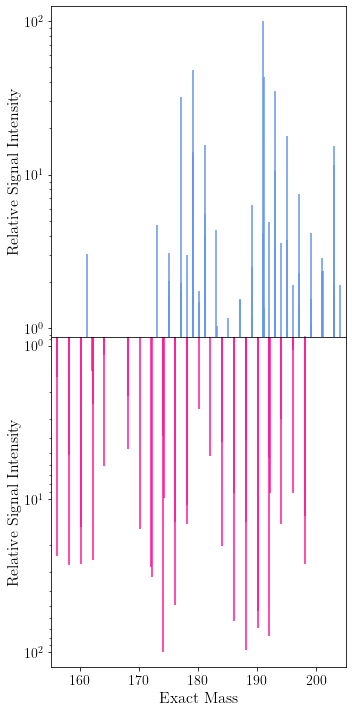

In [28]:
# for some flexibility, create a container for the figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10), sharex=True) # create a figure object
#ax = fig.add_subplot(111) # create an axis object

# first, draw the experimental spectrum
axes[0].vlines(x=mass_list, ymin=0, ymax=normalized_abun, color='cornflowerblue')

# now the CNRN
axes[1].vlines(x=unique_sim_masses, ymin=0, ymax=norm_freq, color='deeppink')

#plt.bar(mass_list, rel_abundance, width=0.5)
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[0].set_ylim([0.875, 125])
axes[1].set_ylim([0.875, 125])
plt.gca().invert_yaxis()
plt.xlim(155, 205)
axes[0].tick_params(axis="y", labelsize=14)
axes[0].tick_params(axis="x", labelsize=14)
axes[1].tick_params(axis="y", labelsize=14)
axes[1].tick_params(axis="x", labelsize=14)
axes[1].set_xlabel('Exact Mass',fontsize=16)
axes[0].set_ylabel('Relative Signal Intensity',fontsize=16)
axes[1].set_ylabel('Relative Signal Intensity',fontsize=16)
#plt.ylabel('Normalized Abundance')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('formose_mirror_plot.png', dpi=500,transparent=True)
plt.show()
plt.close()




In [29]:
# Repat this for a new plot of spectrum : make a list of exact mass and relative abundance.
mass_list = []
rel_abundance = []
for i in range(len(df)):
    # allow entire spectrum for this one
    if float(df['Mass'].iloc[i]) < 750 and "No Hit" not in df['Molecular Formula'].iloc[i]:
        mass_list.append(float(df['Mass'].iloc[i]))
        rel_abundance.append(float(df['Rel. Abundance'].iloc[i]))
# now, "renormalize" the relative abundance.
highest = max(rel_abundance)
norm_factor = 100.0/highest
normalized_abun = []
for ab in rel_abundance:
    normalized_abun.append(norm_factor*ab)
print(f'{len(mass_list)} items in {mass_list}')

5981 items in [514.284397, 276.059461, 290.07511, 304.090759, 318.106404, 332.122051, 360.153356, 374.169016, 388.184672, 402.200327, 260.064547, 274.080196, 288.095848, 302.111495, 330.142786, 344.158432, 358.174086, 372.189745, 234.048904, 248.064545, 262.080195, 276.095849, 290.111499, 318.142789, 332.158433, 346.174088, 360.189754, 264.059457, 278.07511, 292.090761, 306.106406, 320.122055, 348.153349, 362.169006, 376.184671, 390.20032, 302.075108, 316.090754, 330.106403, 344.122047, 372.153366, 386.169014, 400.18467, 414.200336, 428.215966, 268.075505, 282.091158, 310.122444, 272.064558, 286.080198, 300.095843, 314.111491, 342.142787, 356.158441, 370.174096, 384.189754, 252.059461, 266.075115, 280.090761, 294.10641, 308.122056, 336.153349, 350.169001, 364.184663, 318.070022, 332.085666, 346.101313, 360.116975, 374.132627, 402.16394, 416.179594, 430.195242, 444.210895, 458.226495, 222.048904, 236.06455, 250.080196, 264.095846, 278.111497, 292.127147, 320.158439, 334.174084, 306.0700

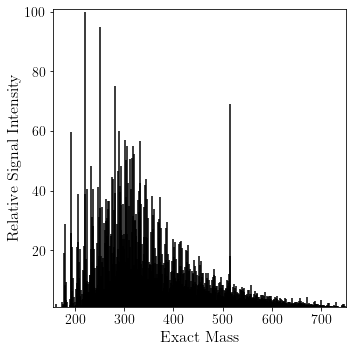

In [33]:
# for some flexibility, create a container for the figure
fig = plt.figure(figsize=(5, 5))

# first, draw the experimental spectrum
plt.vlines(x=mass_list, ymin=0, ymax=normalized_abun, color='black')


#plt.bar(mass_list, rel_abundance, width=0.5)
#axes[0].set_yscale('log')
#axes[1].set_yscale('log')
plt.ylim([0.875, 101])
#plt.gca().invert_yaxis()
plt.xlim(155, 750)
plt.tick_params(axis="y", labelsize=14)
plt.tick_params(axis="x", labelsize=14)
plt.xlabel('Exact Mass',fontsize=16)
plt.ylabel('Relative Signal Intensity',fontsize=16)
#plt.ylabel('Normalized Abundance')
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig('formose_MS_plot.png', dpi=500,transparent=True)
plt.show()
plt.close()